In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.api import OLS, add_constant
import os

In [262]:
os.makedirs("plots", exist_ok=True)

In [263]:
indexdf = pd.read_csv('all_indices_data.csv')

In [264]:
indexdf.head()

,date,open,high,low,close,volume,ticker
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,0.0,^GSPC
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,0.0,^GSPC
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,0.0,^GSPC
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,0.0,^GSPC
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,0.0,^GSPC


In [265]:
feddf = pd.read_csv('FEDFUNDS(1).csv')

In [266]:
# parse date column and filter
indexdf['date'] = pd.to_datetime(indexdf['date'], errors='coerce')
indexdf = indexdf[indexdf['date'] >= '2000-01-01'].copy()
indexdf.reset_index(drop=True, inplace=True)
indexdf.shape, indexdf.head()

((198037, 7),
         date         open         high          low        close  \
 0 2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971   
 1 2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044   
 2 2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985   
 3 2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951   
 4 2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971   
 
          volume ticker  
 0  9.318000e+08  ^GSPC  
 1  1.009000e+09  ^GSPC  
 2  1.085500e+09  ^GSPC  
 3  1.092300e+09  ^GSPC  
 4  1.225200e+09  ^GSPC  )

In [267]:
indexdf.head(500)

,date,open,high,low,close,volume,ticker
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,9.318000e+08,^GSPC
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1.009000e+09,^GSPC
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1.085500e+09,^GSPC
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1.092300e+09,^GSPC
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1.225200e+09,^GSPC
...,...,...,...,...,...,...,...
495,2001-12-24,1144.890015,1147.829956,1144.619995,1144.650024,4.396700e+08,^GSPC
496,2001-12-26,1144.650024,1159.180054,1144.650024,1149.369995,7.911000e+08,^GSPC
497,2001-12-27,1149.369995,1157.130005,1149.369995,1157.130005,8.763000e+08,^GSPC
498,2001-12-28,1157.130005,1164.640015,1157.130005,1161.020020,9.174000e+08,^GSPC


In [268]:
print(indexdf['ticker'].unique())

['^GSPC' '^DJI' '^IXIC' '^NYA' '^XAX' '^BUK100P' '^RUT' '^VIX' '^FTSE'
 '^GDAXI' '^FCHI' '^STOXX50E' '^N100' '^BFX' 'IMOEX.ME' '^N225' '^HSI'
 '000001.SS' '399001.SZ' '^STI' '^AXJO' '^AORD' '^BSESN' '^JKSE' '^KLSE'
 '^NZ50' '^KS11' '^TWII' '^GSPTSE' '^BVSP' '^MXX' '^IPSA' '^MERV'
 '^TA125.TA' '^JN0U.JO']


In [269]:
# List of the 10 key tickers
important_tickers = [
    '^GSPC',   # S&P 500
    '^DJI',    # Dow Jones Industrial Average
    '^IXIC',   # Nasdaq Composite
    '^VIX',    # CBOE Volatility Index
    '^FTSE',   # FTSE 100
    '^GDAXI',  # DAX (Germany)
    '^FCHI',   # CAC 40 (France)
    '^N225',   # Nikkei 225
    '^HSI',    # Hang Seng Index
    '000001.SS' # SSE Composite
]

# Filter the DataFrame
indexdf = indexdf[indexdf['ticker'].isin(important_tickers)]


In [270]:
indexdf = indexdf[['ticker', 'date', 'close']].copy()

In [271]:
indexdf.head()

,ticker,date,close
0,^GSPC,2000-01-03,1455.219971
1,^GSPC,2000-01-04,1399.420044
2,^GSPC,2000-01-05,1402.109985
3,^GSPC,2000-01-06,1403.449951
4,^GSPC,2000-01-07,1441.469971


In [272]:


# Assuming your DataFrame is called indexdf
indexdf['date'] = pd.to_datetime(indexdf['date'])  # ensure datetime type

# Pivot the DataFrame
wide_df = indexdf.pivot(index='date', columns='ticker', values='close')

# (Optional) Sort by date and ensure tickers are in columns
wide_df = wide_df.sort_index()

# Display
print(wide_df.head())


ticker        000001.SS          ^DJI        ^FCHI        ^FTSE       ^GDAXI  \
date                                                                           
2000-01-03          NaN  11357.509766  5917.370117          NaN  6750.759766   
2000-01-04  1406.370972  10997.929688  5672.020020  6665.899902  6586.950195   
2000-01-05  1409.682007  11122.650391  5479.700195  6535.899902  6502.069824   
2000-01-06  1463.942017  11253.259766  5450.109863  6447.200195  6474.919922   
2000-01-07  1516.604004  11522.559570  5539.609863  6504.799805  6780.959961   

ticker            ^GSPC          ^HSI        ^IXIC         ^N225       ^VIX  
date                                                                         
2000-01-03  1455.219971  17369.630859  4131.149902           NaN  24.209999  
2000-01-04  1399.420044  17072.820312  3901.689941  19002.859375  27.010000  
2000-01-05  1402.109985  15846.719727  3877.540039  18542.550781  26.410000  
2000-01-06  1403.449951  15153.230469  3727.12988

In [273]:
returns = wide_df.pct_change()


In [274]:
returns.head()

ticker,000001.SS,^DJI,^FCHI,^FTSE,^GDAXI,^GSPC,^HSI,^IXIC,^N225,^VIX
date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,-0.031660,-0.041463,NaN,-0.024265,-0.038345,-0.017088,-0.055544,NaN,0.115655
2000-01-05,0.002354,0.011340,-0.033907,-0.019502,-0.012886,0.001922,-0.071816,-0.006190,-0.024223,-0.022214
2000-01-06,0.038491,0.011743,-0.005400,-0.013571,-0.004176,0.000956,-0.043762,-0.038790,-0.020185,-0.025748
2000-01-07,0.035973,0.023931,0.016422,0.008934,0.047265,0.027090,0.016656,0.041718,0.001384,-0.155849


In [275]:
returns.dropna(inplace=True)

In [276]:
returns.head()

ticker,000001.SS,^DJI,^FCHI,^FTSE,^GDAXI,^GSPC,^HSI,^IXIC,^N225,^VIX
date,,,,,,,,,,
2000-01-05,0.002354,0.011340,-0.033907,-0.019502,-0.012886,0.001922,-0.071816,-0.006190,-0.024223,-0.022214
2000-01-06,0.038491,0.011743,-0.005400,-0.013571,-0.004176,0.000956,-0.043762,-0.038790,-0.020185,-0.025748
2000-01-07,0.035973,0.023931,0.016422,0.008934,0.047265,0.027090,0.016656,0.041718,0.001384,-0.155849
2000-01-10,0.018797,0.004308,0.019227,0.015819,0.021319,0.011190,0.028725,0.043025,0.000000,-0.000460
2000-01-11,-0.042282,-0.005282,-0.005707,-0.013439,-0.004948,-0.013063,0.000880,-0.031726,0.036140,0.036389


In [277]:
monthly_returns = (1 + returns[['000001.SS', '^DJI', '^FCHI', '^FTSE', '^GDAXI', 
                                   '^GSPC', '^HSI', '^IXIC', '^N225', '^VIX']]).resample('M').prod() - 1


In [278]:
monthly_returns.head()

ticker,000001.SS,^DJI,^FCHI,^FTSE,^GDAXI,^GSPC,^HSI,^IXIC,^N225,^VIX
date,,,,,,,,,,
2000-01-31,0.091459,-0.005219,-0.002153,-0.059617,0.037749,-0.003544,-0.090230,0.009909,0.028250,-0.076268
2000-02-29,0.116991,-0.074240,0.093846,-0.005727,0.118344,-0.020108,0.105399,0.191947,0.021486,-0.063327
2000-03-31,0.049952,0.078356,0.015359,0.049353,-0.005907,0.096720,0.013809,-0.026372,0.018928,0.031665
2000-04-30,0.020051,-0.017214,0.021265,-0.032537,-0.024306,-0.030796,-0.108421,-0.155739,-0.116221,0.086686
2000-05-31,0.031712,-0.019711,0.001019,0.005057,-0.041136,-0.021915,-0.051899,-0.119086,-0.091314,-0.097328


In [279]:
feddf.head()

,observation_date,FEDFUNDS
0,2000-01-01,5.45
1,2000-02-01,5.73
2,2000-03-01,5.85
3,2000-04-01,6.02
4,2000-05-01,6.27


In [280]:
feddf.rename(columns={'observation_date': 'date', 'FEDFUNDS': 'fed_funds_rate'}, inplace=True)

In [281]:
feddf.head()
feddf['date'] = pd.to_datetime(feddf['date'])
feddf = feddf.sort_values('date')

# Shift dates to the end of each month
feddf['date'] = feddf['date'] + pd.offsets.MonthEnd(0)


In [282]:
merged_df2 = monthly_returns.merge(feddf, on='date', how='inner')

In [283]:
merged_df2['fed_funds_rate']= merged_df2['fed_funds_rate'].diff()

In [284]:
merged_df2["fed_change_lag1"] = merged_df2['fed_funds_rate'].shift(1)
merged_df2["fed_change_lag2"] = merged_df2['fed_funds_rate'].shift(2)

In [285]:
merged_df2.head(100)

,date,000001.SS,^DJI,^FCHI,^FTSE,^GDAXI,^GSPC,^HSI,^IXIC,^N225,^VIX,fed_funds_rate,fed_change_lag1,fed_change_lag2
0,2000-01-31,0.091459,-0.005219,-0.002153,-0.059617,0.037749,-0.003544,-0.090230,0.009909,0.028250,-0.076268,NaN,NaN,NaN
1,2000-02-29,0.116991,-0.074240,0.093846,-0.005727,0.118344,-0.020108,0.105399,0.191947,0.021486,-0.063327,0.28,NaN,NaN
2,2000-03-31,0.049952,0.078356,0.015359,0.049353,-0.005907,0.096720,0.013809,-0.026372,0.018928,0.031665,0.12,0.28,NaN
3,2000-04-30,0.020051,-0.017214,0.021265,-0.032537,-0.024306,-0.030796,-0.108421,-0.155739,-0.116221,0.086686,0.17,0.12,0.28
4,2000-05-31,0.031712,-0.019711,0.001019,0.005057,-0.041136,-0.021915,-0.051899,-0.119086,-0.091314,-0.097328,0.25,0.17,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2007-12-31,0.080009,-0.007994,-0.009962,0.003793,0.025005,-0.008629,-0.029010,-0.003262,-0.023780,-0.016178,-0.25,-0.27,-0.18
96,2008-01-31,-0.166903,-0.046323,-0.132576,-0.089377,-0.150678,-0.061163,-0.156652,-0.098941,-0.112055,0.164444,-0.30,-0.25,-0.27
97,2008-02-29,-0.007950,-0.030353,-0.016249,0.000765,-0.015123,-0.034761,0.037344,-0.049534,0.000776,0.012977,-0.96,-0.30,-0.25
98,2008-03-31,-0.201408,-0.000285,-0.017449,-0.030964,-0.031588,-0.005960,-0.060928,0.003355,-0.079209,-0.035041,-0.37,-0.96,-0.30


In [286]:
merged_df2 = merged_df2.dropna().copy()
merged_df2.head()

,date,000001.SS,^DJI,^FCHI,^FTSE,^GDAXI,^GSPC,^HSI,^IXIC,^N225,^VIX,fed_funds_rate,fed_change_lag1,fed_change_lag2
3,2000-04-30,0.020051,-0.017214,0.021265,-0.032537,-0.024306,-0.030796,-0.108421,-0.155739,-0.116221,0.086686,0.17,0.12,0.28
4,2000-05-31,0.031712,-0.019711,0.001019,0.005057,-0.041136,-0.021915,-0.051899,-0.119086,-0.091314,-0.097328,0.25,0.17,0.12
5,2000-06-30,0.017710,-0.007075,0.003156,-0.007343,-0.029743,0.023934,0.097997,0.166191,0.066040,-0.173784,0.26,0.25,0.17
6,2000-07-31,0.049496,0.007091,0.014884,0.008332,0.042353,-0.016341,0.042412,-0.050205,-0.096695,0.061412,0.01,0.26,0.25
7,2000-08-31,-0.001156,0.065873,0.012676,0.048293,0.003627,0.060699,0.015232,0.116634,0.072088,-0.188042,-0.04,0.01,0.26


In [287]:
import statsmodels.api as sm

In [288]:
lag_results= {}

for ticker in merged_df2.columns:
    if ticker not in ['fed_funds_rate', 'fed_change_lag1', 'fed_change_lag2', 'date']:
        df = merged_df2[[ticker,'fed_funds_rate','fed_change_lag1', 'fed_change_lag2']].dropna()
        x = sm.add_constant(df[['fed_funds_rate','fed_change_lag1', 'fed_change_lag2']])
        y = df[ticker]
        model = sm.OLS(y, x).fit()
        lag_results[ticker] = model

In [289]:
lag_results['^GSPC'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ^GSPC   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.231
Date:                Thu, 06 Nov 2025   Prob (F-statistic):             0.0228
Time:                        09:10:56   Log-Likelihood:                 499.99
No. Observations:                 291   AIC:                            -992.0
Df Residuals:                     287   BIC:                            -977.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0055      0.003      2.133      0.034       0.000       0.011
fed_funds_rate      0.0538      0.019      2.757      0.006       0.015       0.092
fed_change_lag1    -0.0526      0.023     -2.253      0.025      -0.099      -0.007
fed_change_lag2     0.0247      0.019      1.275      0.203      -0.013       0.063
==============================================================================
Omnibus:                        7.832   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.663
Skew:                          -0.378   Prob(JB):                       0.0217
Kurtosis:                       3.247   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [290]:
print(lag_results['^GSPC'].summary())

                            OLS Regression Results                            
Dep. Variable:                  ^GSPC   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.231
Date:                Thu, 06 Nov 2025   Prob (F-statistic):             0.0228
Time:                        09:10:56   Log-Likelihood:                 499.99
No. Observations:                 291   AIC:                            -992.0
Df Residuals:                     287   BIC:                            -977.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0055      0.003     

In [291]:
summary_lag = pd.DataFrame({
    'Ticker': lag_results.keys(),
    'β₀ (Current)': [res.params['fed_funds_rate'] for res in lag_results.values()],
    'β₁ (Lag 1)': [res.params['fed_change_lag1'] for res in lag_results.values()],
    'β₂ (Lag 2)': [res.params['fed_change_lag2'] for res in lag_results.values()],
    'Adj. R²': [res.rsquared_adj for res in lag_results.values()],
    'p-value (Current)': [res.pvalues['fed_funds_rate'] for res in lag_results.values()]
}).reset_index(drop=True)

print(summary_lag)


      Ticker  β₀ (Current)  β₁ (Lag 1)  β₂ (Lag 2)   Adj. R²  \
0  000001.SS      0.035257    0.025746   -0.021393  0.004184   
1       ^DJI      0.052002   -0.060355    0.031418  0.026894   
2      ^FCHI      0.057537   -0.033355    0.025532  0.026325   
3      ^FTSE      0.050993   -0.033750    0.013624  0.026528   
4     ^GDAXI      0.054733   -0.044150    0.023292  0.009884   
5      ^GSPC      0.053755   -0.052605    0.024748  0.022557   
6       ^HSI      0.033911    0.025280   -0.027430  0.006239   
7      ^IXIC      0.039599   -0.035819    0.009153 -0.002826   
8      ^N225      0.070767   -0.036163   -0.007243  0.020288   
9       ^VIX     -0.204433    0.262046   -0.052364  0.008479   

   p-value (Current)  
0           0.259699  
1           0.006112  
2           0.010390  
3           0.002916  
4           0.034815  
5           0.006201  
6           0.213325  
7           0.157486  
8           0.003368  
9           0.050019  


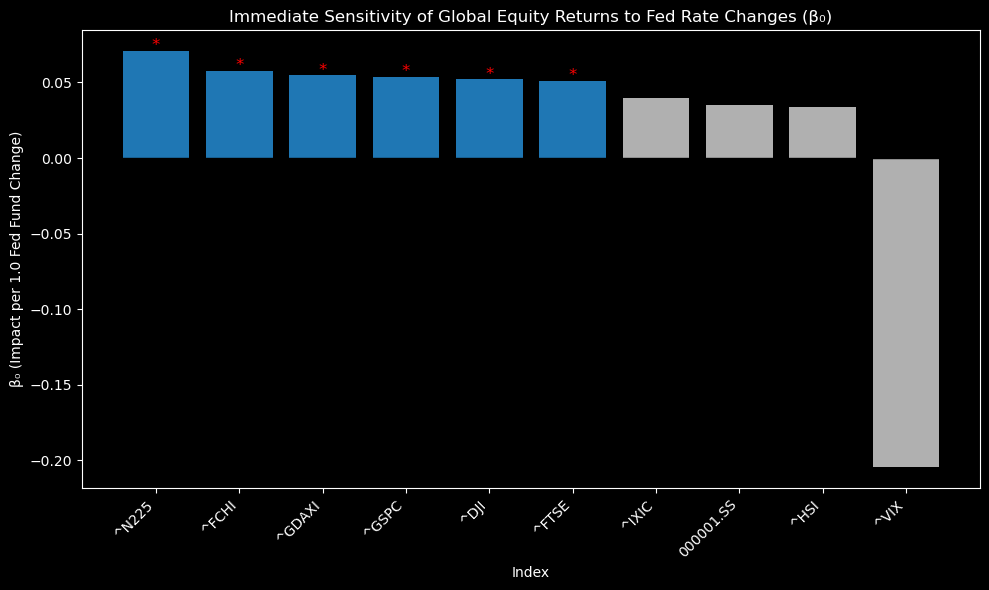

In [292]:
import matplotlib.pyplot as plt
import numpy as np

# Sort tickers by β₀ magnitude
summary_lag_sorted = summary_lag.sort_values('β₀ (Current)', ascending=False)

# Determine significance colors
colors = ['#1f77b4' if p < 0.05 else '#b0b0b0' for p in summary_lag_sorted['p-value (Current)']]

plt.figure(figsize=(10,6))
plt.bar(summary_lag_sorted['Ticker'], summary_lag_sorted['β₀ (Current)'], color=colors)
plt.axhline(0, color='black', linewidth=1)
plt.title("Immediate Sensitivity of Global Equity Returns to Fed Rate Changes (β₀)")
plt.xlabel("Index")
plt.ylabel("β₀ (Impact per 1.0 Fed Fund Change)")
plt.xticks(rotation=45, ha='right')

# Annotate bars with significance markers
for i, p in enumerate(summary_lag_sorted['p-value (Current)']):
    if p < 0.05:
        plt.text(i, summary_lag_sorted['β₀ (Current)'].iloc[i] + 0.0005, "*", ha='center', fontsize=12, color='red')

plt.tight_layout()
plt.savefig("plots/ols_impact_bar.png", dpi=300, bbox_inches='tight')
plt.show()


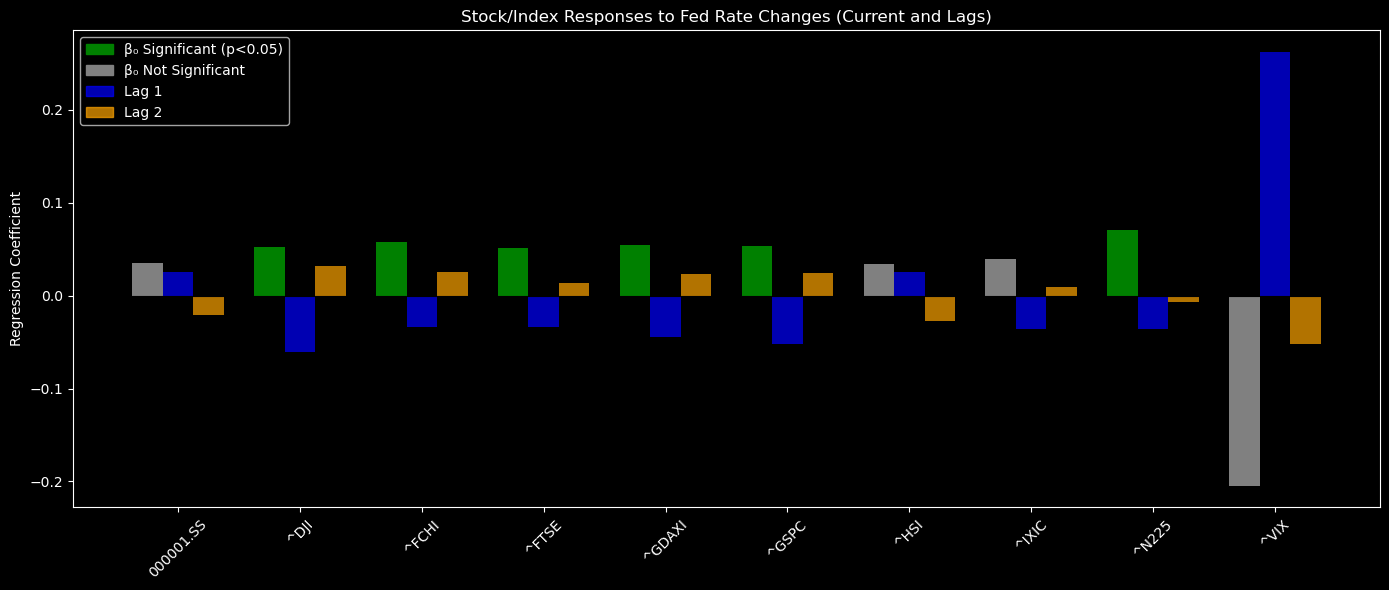

In [293]:


ols_results = pd.DataFrame({
    'Ticker': ['000001.SS','^DJI','^FCHI','^FTSE','^GDAXI','^GSPC','^HSI','^IXIC','^N225','^VIX'],
    'β₀ (Current)': [0.035257,0.052002,0.057537,0.050993,0.054733,0.053755,0.033911,0.039599,0.070767,-0.204433],
    'β₁ (Lag 1)': [0.025746,-0.060355,-0.033355,-0.033750,-0.044150,-0.052605,0.025280,-0.035819,-0.036163,0.262046],
    'β₂ (Lag 2)': [-0.021393,0.031418,0.025532,0.013624,0.023292,0.024748,-0.027430,0.009153,-0.007243,-0.052364],
    'p-value (Current)': [0.259699,0.006112,0.010390,0.002916,0.034815,0.006201,0.213325,0.157486,0.003368,0.050019]
})

# Set bar positions
tickers = ols_results['Ticker']
x = np.arange(len(tickers))
width = 0.25

# Plot bars
fig, ax = plt.subplots(figsize=(14,6))

# Colors: highlight β₀ significance
colors = ['green' if p < 0.05 else 'gray' for p in ols_results['p-value (Current)']]

ax.bar(x - width, ols_results['β₀ (Current)'], width, color=colors, label='Current (β₀)')
ax.bar(x, ols_results['β₁ (Lag 1)'], width, color='blue', alpha=0.7, label='Lag 1 (β₁)')
ax.bar(x + width, ols_results['β₂ (Lag 2)'], width, color='orange', alpha=0.7, label='Lag 2 (β₂)')

# Axes and labels
ax.set_xticks(x)
ax.set_xticklabels(tickers, rotation=45)
ax.set_ylabel('Regression Coefficient')
ax.set_title('Stock/Index Responses to Fed Rate Changes (Current and Lags)')
ax.axhline(0, color='black', linewidth=0.8)

# Legend
import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='green', label='β₀ Significant (p<0.05)')
gray_patch = mpatches.Patch(color='gray', label='β₀ Not Significant')
blue_patch = mpatches.Patch(color='blue', alpha=0.7, label='Lag 1')
orange_patch = mpatches.Patch(color='orange', alpha=0.7, label='Lag 2')

ax.legend(handles=[green_patch, gray_patch, blue_patch, orange_patch])
plt.tight_layout()
plt.savefig("plots/ols_regression_results.png", dpi=300, bbox_inches='tight')
plt.show()


In [294]:




# Add significance column
ols_results['β₀ Significant'] = ols_results['p-value (Current)'] < 0.05

# Reorder / format table nicely
summary_table = ols_results[['Ticker', 'β₀ (Current)', 'β₁ (Lag 1)', 'β₂ (Lag 2)', 'β₀ Significant', 'p-value (Current)']]
summary_table = summary_table.sort_values('β₀ (Current)', ascending=False)

# Display table
print(summary_table)


      Ticker  β₀ (Current)  β₁ (Lag 1)  β₂ (Lag 2)  β₀ Significant  \
8      ^N225      0.070767   -0.036163   -0.007243            True   
2      ^FCHI      0.057537   -0.033355    0.025532            True   
4     ^GDAXI      0.054733   -0.044150    0.023292            True   
5      ^GSPC      0.053755   -0.052605    0.024748            True   
1       ^DJI      0.052002   -0.060355    0.031418            True   
3      ^FTSE      0.050993   -0.033750    0.013624            True   
7      ^IXIC      0.039599   -0.035819    0.009153           False   
0  000001.SS      0.035257    0.025746   -0.021393           False   
6       ^HSI      0.033911    0.025280   -0.027430           False   
9       ^VIX     -0.204433    0.262046   -0.052364           False   

   p-value (Current)  
8           0.003368  
2           0.010390  
4           0.034815  
5           0.006201  
1           0.006112  
3           0.002916  
7           0.157486  
0           0.259699  
6           0.213325  

In [295]:
#now we go on to apply VAR and compute impulse response functions of each index to a shock in fed funds rate
from statsmodels.tsa.api import VAR
import warnings 
warnings.filterwarnings("ignore")


In [296]:


# Choose variables for VAR
exclude_cols = ['fed_funds_rate', 'fed_change_lag1', 'fed_change_lag2']
ticker_cols = [c for c in merged_df2.columns if c not in exclude_cols]

# Include fed_change first
var_vars = ['fed_funds_rate'] + ticker_cols

# Drop rows with NaNs (first rows due to lags)
var_data = merged_df2[var_vars].dropna()
var_data = var_data.apply(pd.to_numeric, errors='coerce')

print("VAR data shape:", var_data.shape)
print(var_data.head())


VAR data shape: (291, 12)
   fed_funds_rate                date  000001.SS      ^DJI     ^FCHI  \
3            0.17  957052800000000000   0.020051 -0.017214  0.021265   
4            0.25  959731200000000000   0.031712 -0.019711  0.001019   
5            0.26  962323200000000000   0.017710 -0.007075  0.003156   
6            0.01  965001600000000000   0.049496  0.007091  0.014884   
7           -0.04  967680000000000000  -0.001156  0.065873  0.012676   

      ^FTSE    ^GDAXI     ^GSPC      ^HSI     ^IXIC     ^N225      ^VIX  
3 -0.032537 -0.024306 -0.030796 -0.108421 -0.155739 -0.116221  0.086686  
4  0.005057 -0.041136 -0.021915 -0.051899 -0.119086 -0.091314 -0.097328  
5 -0.007343 -0.029743  0.023934  0.097997  0.166191  0.066040 -0.173784  
6  0.008332  0.042353 -0.016341  0.042412 -0.050205 -0.096695  0.061412  
7  0.048293  0.003627  0.060699  0.015232  0.116634  0.072088 -0.188042  


In [297]:

model = VAR(var_data)

# Up to 6 lags for monthly data
lag_order = model.select_order(maxlags=6)
print("Lag selection criteria:\n", lag_order.summary())

selected_lag = lag_order.aic
print(f"\nSelected lag based on AIC: {selected_lag}")


Lag selection criteria:
  VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       9.000       9.153       8100.       9.061
1      -2.446    -0.4470*     0.08668      -1.645
2     -4.005*     -0.1603    0.01832*     -2.464*
3      -3.704       1.986     0.02507      -1.423
4      -3.004       4.531     0.05168     0.01668
5      -2.155       7.226      0.1256       1.606
6      -1.385       9.842      0.2879       3.115
-------------------------------------------------

Selected lag based on AIC: 2


In [298]:
var_res = model.fit(selected_lag)
print(var_res.summary())

# Check stability
print("\nMax root modulus (should be <1 for stability):", np.max(np.abs(var_res.roots)))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, Nov, 2025
Time:                     09:11:02
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                 -0.0790750
Nobs:                     289.000    HQIC:                  -2.36002
Log likelihood:          -4059.49    FPE:                  0.0206539
AIC:                     -3.88505    Det(Omega_mle):      0.00763168
--------------------------------------------------------------------
Results for equation fed_funds_rate
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.000000         0.441719           -0.000           1.000
L1.fed_funds_rate         0.000000         0.091058            0.000           1.000
L1.date                  -0.000000 

In [299]:
print(var_data.columns.tolist())
print(var_res.names)

['fed_funds_rate', 'date', '000001.SS', '^DJI', '^FCHI', '^FTSE', '^GDAXI', '^GSPC', '^HSI', '^IXIC', '^N225', '^VIX']
['fed_funds_rate', 'date', '000001.SS', '^DJI', '^FCHI', '^FTSE', '^GDAXI', '^GSPC', '^HSI', '^IXIC', '^N225', '^VIX']


In [300]:
shock_index = var_vars.index('fed_funds_rate')
cum_responses = {}

for j, varname in enumerate(var_vars):
    if varname == 'fed_funds_rate':
        continue  # skip self-response
    resp = irf.orth_irfs[:, j, shock_index]
    cum_responses[varname] = np.cumsum(resp)

cum_df = pd.DataFrame(cum_responses)
print("\nCumulative Responses (first few periods):")
print(cum_df.head())



Cumulative Responses (first few periods):
           date  000001.SS      ^DJI     ^FCHI     ^FTSE    ^GDAXI     ^GSPC  \
0 -3.354758e+12   0.008485  0.004450  0.008071  0.006381  0.006322  0.004647   
1 -9.932226e+12   0.008475  0.004471  0.008109  0.006397  0.006350  0.004685   
2 -1.960581e+13   0.008466  0.004491  0.008145  0.006413  0.006378  0.004722   
3 -3.225414e+13   0.008456  0.004511  0.008180  0.006428  0.006404  0.004756   
4 -4.776085e+13   0.008448  0.004530  0.008213  0.006442  0.006430  0.004790   

       ^HSI     ^IXIC     ^N225      ^VIX  
0  0.008883  0.002971  0.007713 -0.010050  
1  0.008861  0.003020  0.007751 -0.010056  
2  0.008839  0.003067  0.007788 -0.010061  
3  0.008819  0.003112  0.007823 -0.010067  
4  0.008799  0.003156  0.007856 -0.010072  


In [301]:
import matplotlib.patches as mpatches

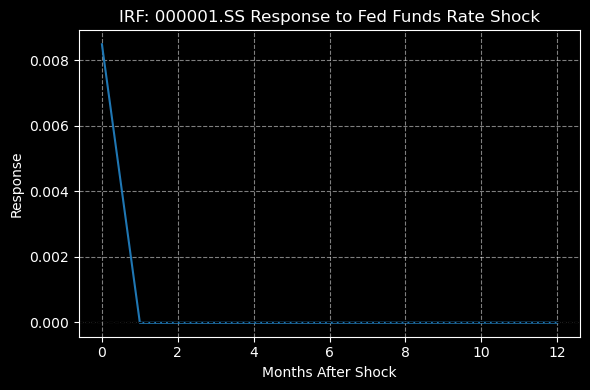

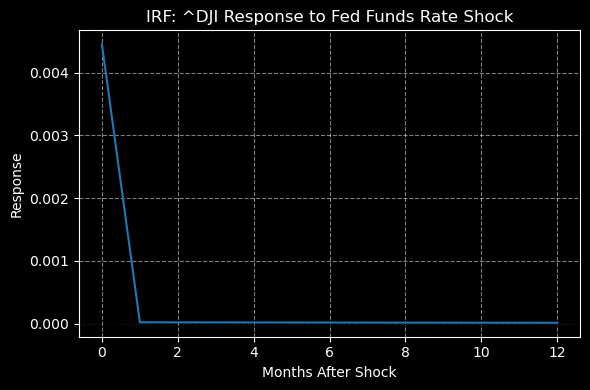

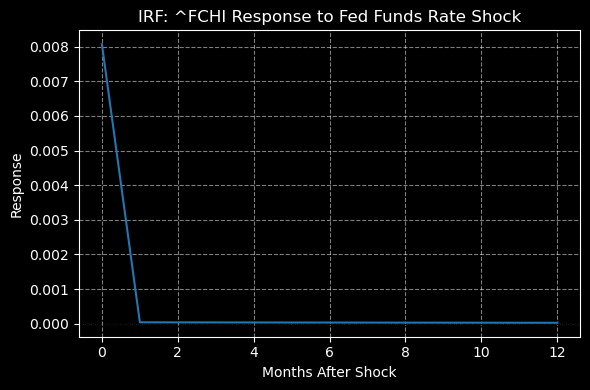

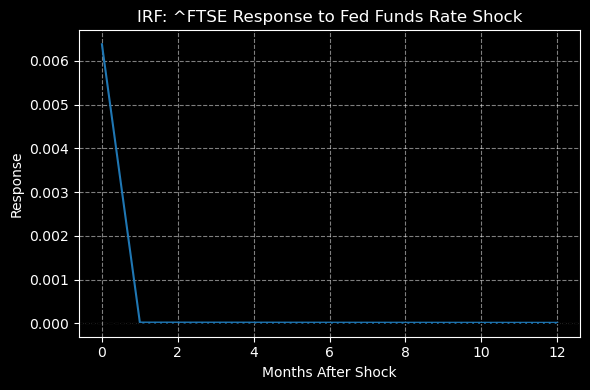

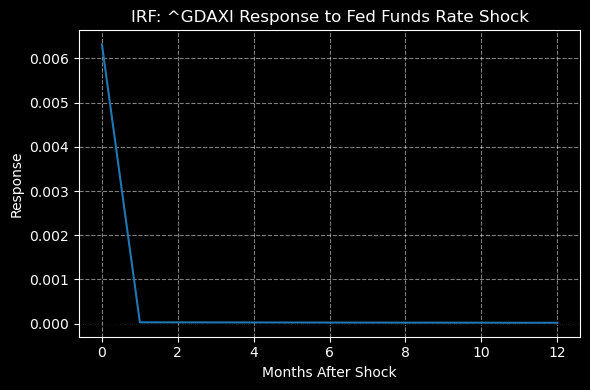

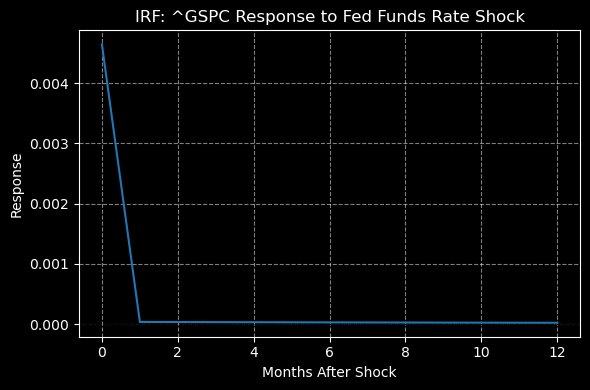

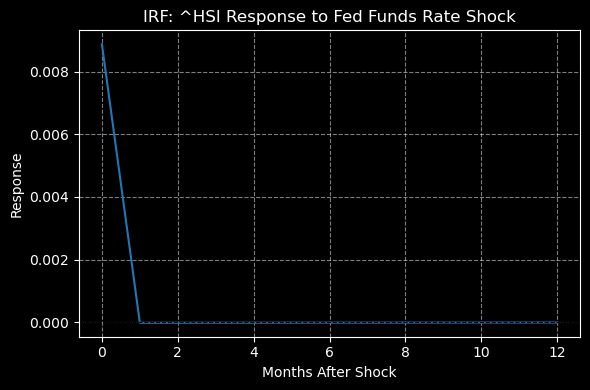

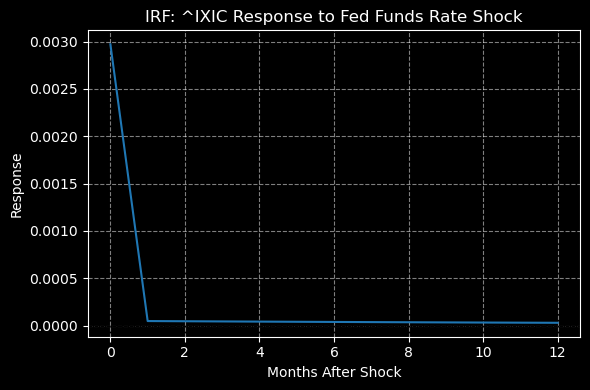

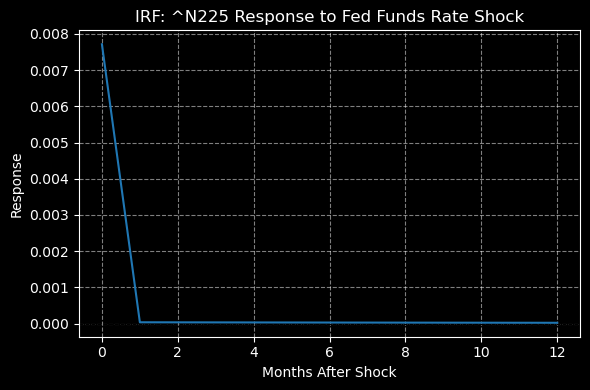

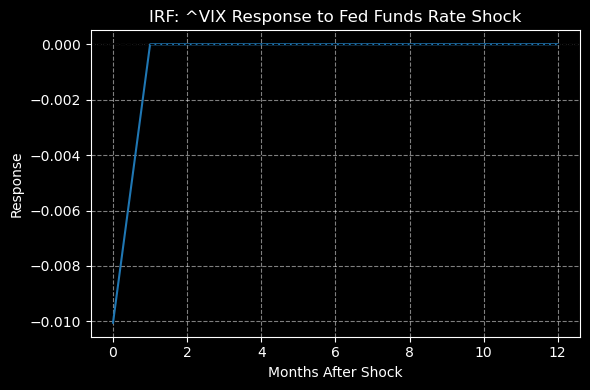


✅ Plotted IRFs for 10 valid tickers: ['000001.SS', '^DJI', '^FCHI', '^FTSE', '^GDAXI', '^GSPC', '^HSI', '^IXIC', '^N225', '^VIX']


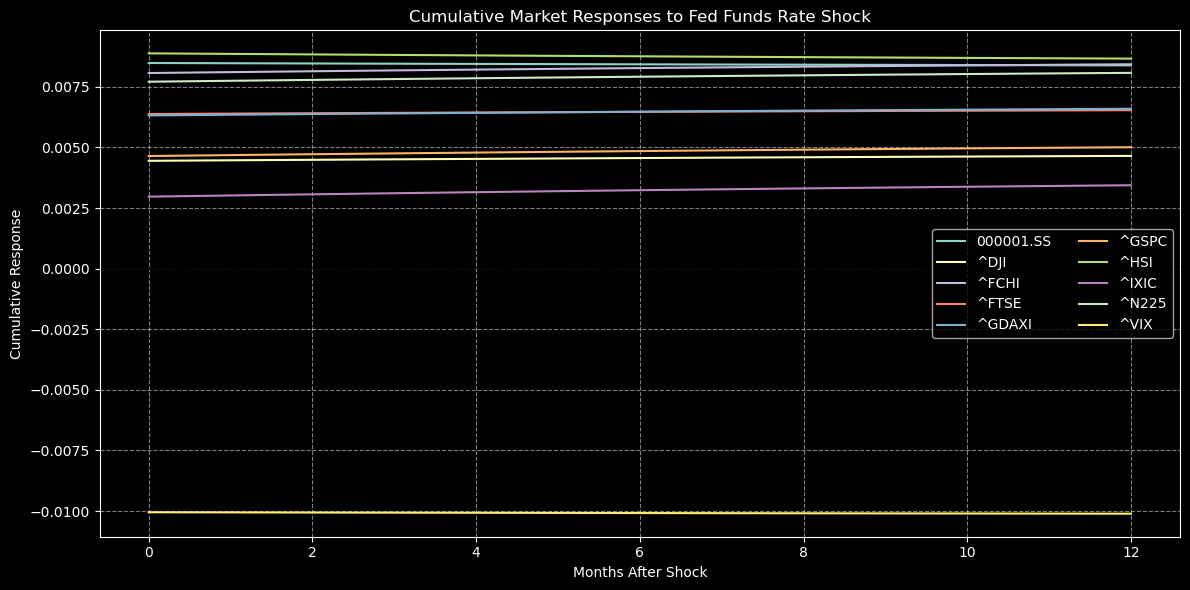

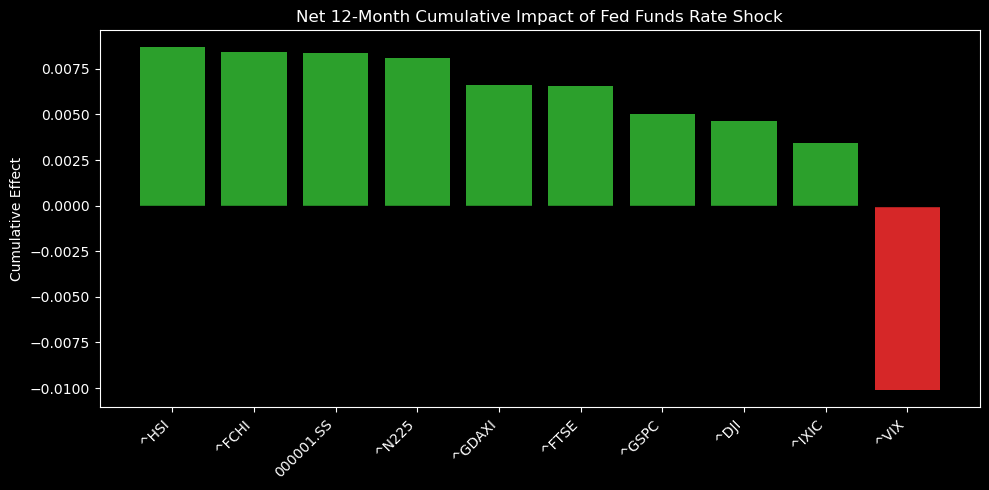


📈 Summary of Dynamic (Cumulative 12-Month) Responses:
      Ticker  Cumulative_12m_Response Response_Sign
0       ^HSI                 0.008667      Positive
1      ^FCHI                 0.008434      Positive
2  000001.SS                 0.008388      Positive
3      ^N225                 0.008079      Positive
4     ^GDAXI                 0.006597      Positive
5      ^FTSE                 0.006538      Positive
6      ^GSPC                 0.005011      Positive
7       ^DJI                 0.004653      Positive
8      ^IXIC                 0.003442      Positive
9       ^VIX                -0.010110      Negative


In [302]:
#irf + cumulative response visualisation

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

impulse = 'fed_funds_rate'
all_vars = [v for v in var_res.names if v not in ['date']]  # drop date if present
response_vars = [v for v in all_vars if v != impulse]

shock_index = var_res.names.index(impulse)
irf_periods = 12

cum_responses = {}
valid_responses = []

# --- Individual IRFs ---
for var in response_vars:
    j = var_res.names.index(var)
    response_values = irf.orth_irfs[:, j, shock_index]

    if np.allclose(response_values, 0, atol=1e-10) or np.isnan(response_values).all():
        continue  # skip empty responses

    valid_responses.append(var)
    cum_responses[var] = np.cumsum(response_values)

    plt.figure(figsize=(6, 4))
    plt.plot(range(irf_periods + 1), response_values, color='tab:blue')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title(f'IRF: {var} Response to Fed Funds Rate Shock')
    plt.xlabel('Months After Shock')
    plt.ylabel('Response')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f"plots/irf_{var}.png", dpi=300, bbox_inches='tight')
    plt.show()

print(f"\n✅ Plotted IRFs for {len(valid_responses)} valid tickers: {valid_responses}")

# --- Cumulative Responses ---
if cum_responses:
    cum_df = pd.DataFrame(cum_responses, index=range(irf_periods + 1))
    cum_df.index.name = 'Month'

    # Drop any all-NaN columns (just in case)
    cum_df = cum_df.dropna(axis=1, how='all')

    if cum_df.shape[1] > 0:
        plt.figure(figsize=(12, 6))
        for col in cum_df.columns:
            plt.plot(cum_df.index, cum_df[col], label=col)
        plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
        plt.title('Cumulative Market Responses to Fed Funds Rate Shock')
        plt.xlabel('Months After Shock')
        plt.ylabel('Cumulative Response')
        plt.legend(loc='best', ncol=2)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.savefig("plots/cumulative_responses.png", dpi=300, bbox_inches='tight')
        plt.show()

        # --- Net 12-Month Cumulative Impact ---
        peak_responses = cum_df.iloc[-1].sort_values(ascending=False)
        plt.figure(figsize=(10, 5))
        plt.bar(peak_responses.index, peak_responses.values,
                color=['#2ca02c' if v > 0 else '#d62728' for v in peak_responses.values])
        plt.axhline(0, color='black', linewidth=1)
        plt.title('Net 12-Month Cumulative Impact of Fed Funds Rate Shock')
        plt.ylabel('Cumulative Effect')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig("plots/net_12m_cumulative_impact.png", dpi=300, bbox_inches='tight')
        plt.show()

        # Summary Table
        summary_dynamic = pd.DataFrame({
            'Ticker': peak_responses.index,
            'Cumulative_12m_Response': peak_responses.values,
            'Response_Sign': ['Positive' if v > 0 else 'Negative' for v in peak_responses.values]
        })

        print("\n📈 Summary of Dynamic (Cumulative 12-Month) Responses:")
        print(summary_dynamic)
    else:
        print("\n⚠️ No valid cumulative responses found (all NaN after cleaning).")
else:
    print("\n⚠️ No valid IRF responses found — check VAR model or differencing step.")


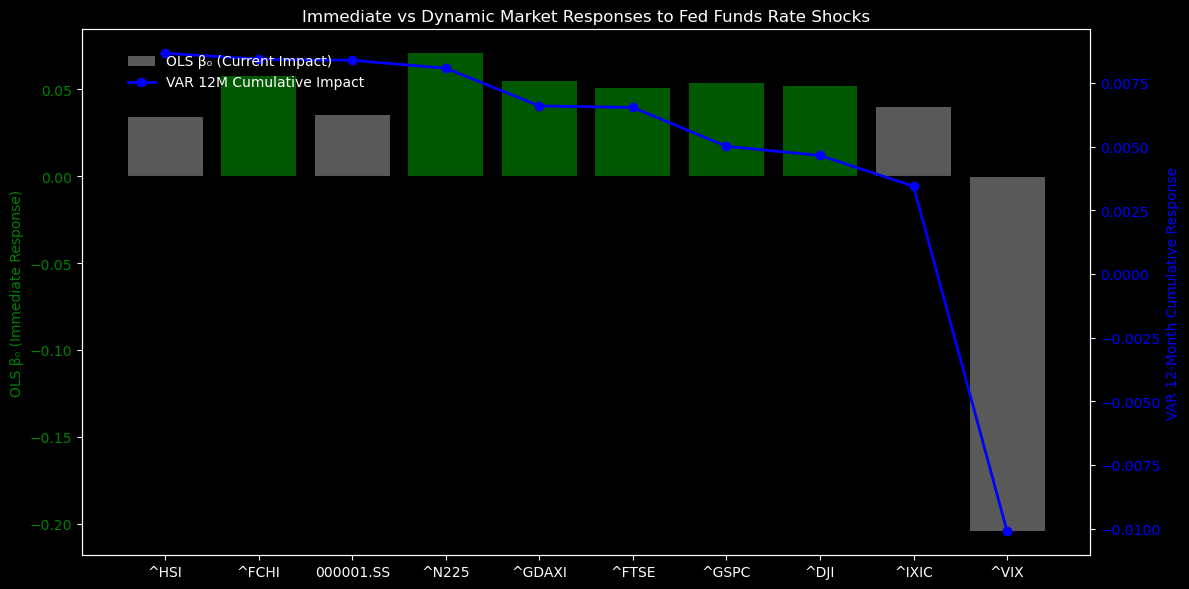


📊 Combined OLS vs VAR summary:

      Ticker  β₀ (Current)  p-value (Current)  Cumulative_12m_Response
0       ^HSI        0.0339             0.2133                   0.0087
1      ^FCHI        0.0575             0.0104                   0.0084
2  000001.SS        0.0353             0.2597                   0.0084
3      ^N225        0.0708             0.0034                   0.0081
4     ^GDAXI        0.0547             0.0348                   0.0066
5      ^FTSE        0.0510             0.0029                   0.0065
6      ^GSPC        0.0538             0.0062                   0.0050
7       ^DJI        0.0520             0.0061                   0.0047
8      ^IXIC        0.0396             0.1575                   0.0034
9       ^VIX       -0.2044             0.0500                  -0.0101


In [ ]:

# COMBINED VISUALIZATION: OLS β₀ vs VAR 12-Month Response


# Ensure both OLS and VAR results exist
if 'summary_lag' in locals() and 'summary_dynamic' in locals():
    combined_df = pd.merge(
        summary_lag[['Ticker', 'β₀ (Current)', 'p-value (Current)']],
        summary_dynamic[['Ticker', 'Cumulative_12m_Response']],
        on='Ticker',
        how='inner'
    )

    # Sort by VAR cumulative effect for readability
    combined_df = combined_df.sort_values('Cumulative_12m_Response', ascending=False).reset_index(drop=True)

    # Significance coloring for β₀
    sig_colors = combined_df['p-value (Current)'].apply(lambda p: 'green' if p < 0.05 else 'gray')

    # Plot
    fig, ax1 = plt.subplots(figsize=(12,6))

    # Left y-axis: OLS β₀ (bars)
    ax1.bar(combined_df['Ticker'], combined_df['β₀ (Current)'],
            color=sig_colors, alpha=0.7, label='OLS β₀ (Current Impact)')
    ax1.set_ylabel('OLS β₀ (Immediate Response)', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Right y-axis: VAR 12m Cumulative (line)
    ax2 = ax1.twinx()
    ax2.plot(combined_df['Ticker'], combined_df['Cumulative_12m_Response'],
             color='blue', marker='o', linewidth=2, label='VAR 12M Cumulative Impact')
    ax2.set_ylabel('VAR 12-Month Cumulative Response', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Titles and layout
    plt.title("Immediate vs Dynamic Market Responses to Fed Funds Rate Shocks")
    plt.xticks(rotation=45, ha='right')
    ax1.axhline(0, color='black', linewidth=0.8)
    fig.tight_layout()

    # Legend
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.92), frameon=False)
    plt.savefig("plots/ols_impact_bar.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Summary printout
    print("\n📊 Combined OLS vs VAR summary:\n")
    print(combined_df.round(4))

else:
    print("\n⚠️ Missing inputs: Please ensure both 'summary_lag' (OLS) and 'summary_dynamic' (VAR) are defined.")
